In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('kaggle-housing-data/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# deleting points that are extreme outliers
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [5]:
COLUMNS_TO_KEEP = {
    'LotArea': 'Lot Area',
    'YearBuilt': 'Year Built',
    'YearRemodAdd': 'Year Remodelled',
    'GrLivArea': 'Living Area in Sq. Ft.',
    'GarageCars': 'Garage Car Capacity',
    'BedroomAbvGr': '# of Bedrooms',
    'FullBath': '# of Full Bathrooms',
#     'Street': 'Type of Road Access =',
#     'Alley': 'Type of Alley Access =',
#     'LotShape': 'General Lot Shape =',
#     'Utilities': 'Type of Utilities =',
#     'BldgType': 'Building Type =',
#     'HouseStyle': 'House Type =',
    'OverallQual': 'Material Quality Score =',
    'OverallCond': 'Overall House Condition Rating =',
#     'BsmtCond': 'Condition of the Basement =',
    'HalfBath': '# of Half Bathrooms',
    'Kitchen': '# of Kitchens',
#     'GarageCond': 'Condition of the Garage =',
#     'SaleType': 'Type of Sale =',
#     'SaleCondition': 'Condition of Sale =',
    'SalePrice': 'Sale Price'
}

In [6]:
for i in df_train.columns:
    if i not in COLUMNS_TO_KEEP:
        del df_train[i]

In [7]:
df_train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,GarageCars,SalePrice
0,8450,7,5,2003,2003,1710,2,1,3,2,208500
1,9600,6,8,1976,1976,1262,2,0,3,2,181500
2,11250,7,5,2001,2002,1786,2,1,3,2,223500
3,9550,7,5,1915,1970,1717,1,0,3,3,140000
4,14260,8,5,2000,2000,2198,2,1,4,3,250000


In [8]:
cols = []
for i in df_train.columns:
    cols.append(COLUMNS_TO_KEEP[i])

df_train.columns = cols
df_train.head()

,Lot Area,Material Quality Score =,Overall House Condition Rating =,Year Built,Year Remodelled,Living Area in Sq. Ft.,# of Full Bathrooms,# of Half Bathrooms,# of Bedrooms,Garage Car Capacity,Sale Price
0,8450,7,5,2003,2003,1710,2,1,3,2,208500
1,9600,6,8,1976,1976,1262,2,0,3,2,181500
2,11250,7,5,2001,2002,1786,2,1,3,2,223500
3,9550,7,5,1915,1970,1717,1,0,3,3,140000
4,14260,8,5,2000,2000,2198,2,1,4,3,250000


In [9]:
# Missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Sale Price,0,0.0
Garage Car Capacity,0,0.0
# of Bedrooms,0,0.0
# of Half Bathrooms,0,0.0
# of Full Bathrooms,0,0.0
Living Area in Sq. Ft.,0,0.0
Year Remodelled,0,0.0
Year Built,0,0.0
Overall House Condition Rating =,0,0.0
Material Quality Score =,0,0.0


In [10]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [11]:
train = df_train
y_train = df_train['Sale Price']
del train['Sale Price']

In [12]:
train.shape

(1458, 10)

In [13]:
train.dtypes

Lot Area                            int64
Material Quality Score =            int64
Overall House Condition Rating =    int64
Year Built                          int64
Year Remodelled                     int64
Living Area in Sq. Ft.              int64
# of Full Bathrooms                 int64
# of Half Bathrooms                 int64
# of Bedrooms                       int64
Garage Car Capacity                 int64
dtype: object

In [14]:
SPL_COLS = ['Material Quality Score =', 'Overall House Condition Rating =']

for col in SPL_COLS:
    if col in train.columns:
        train[col] = train[col].astype(str)

In [15]:
train.dtypes

Lot Area                             int64
Material Quality Score =            object
Overall House Condition Rating =    object
Year Built                           int64
Year Remodelled                      int64
Living Area in Sq. Ft.               int64
# of Full Bathrooms                  int64
# of Half Bathrooms                  int64
# of Bedrooms                        int64
Garage Car Capacity                  int64
dtype: object

In [16]:
train = pd.get_dummies(train)
train.head()

,Lot Area,Year Built,Year Remodelled,Living Area in Sq. Ft.,# of Full Bathrooms,# of Half Bathrooms,# of Bedrooms,Garage Car Capacity,Material Quality Score =_1,Material Quality Score =_10,...,Material Quality Score =_9,Overall House Condition Rating =_1,Overall House Condition Rating =_2,Overall House Condition Rating =_3,Overall House Condition Rating =_4,Overall House Condition Rating =_5,Overall House Condition Rating =_6,Overall House Condition Rating =_7,Overall House Condition Rating =_8,Overall House Condition Rating =_9
0,8450,2003,2003,1710,2,1,3,2,0,0,...,0,0,0,0,0,1,0,0,0,0
1,9600,1976,1976,1262,2,0,3,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11250,2001,2002,1786,2,1,3,2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,9550,1915,1970,1717,1,0,3,3,0,0,...,0,0,0,0,0,1,0,0,0,0
4,14260,2000,2000,2198,2,1,4,3,0,0,...,0,0,0,0,0,1,0,0,0,0


## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train, y_train)

y_train_pred = lr.predict(train)

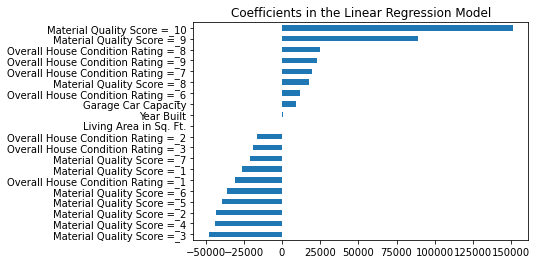

In [18]:
coefs = pd.Series(list(lr.coef_), index=train.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")

plt.title("Coefficients in the Linear Regression Model")
plt.show()

## Lasso Regression

In [19]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 1.0


In [20]:
print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Try again for more precision with alphas centered around 1.0
Best alpha : 1.4


Lasso picked 25 features and eliminated the other 2 features


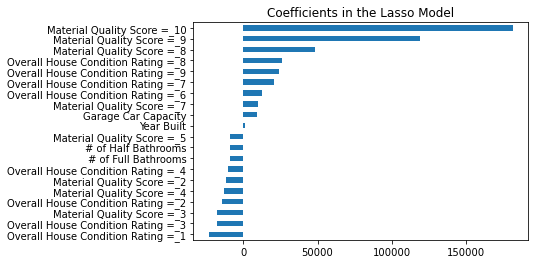

In [21]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

# What are the dropped coefficients? We will need this to create the writeup

In [22]:
print(coefs[(coefs == 0)])

Material Quality Score =_1            0.0
Overall House Condition Rating =_5    0.0
dtype: float64


## Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(train, y_train)

DecisionTreeRegressor(max_depth=3)

''

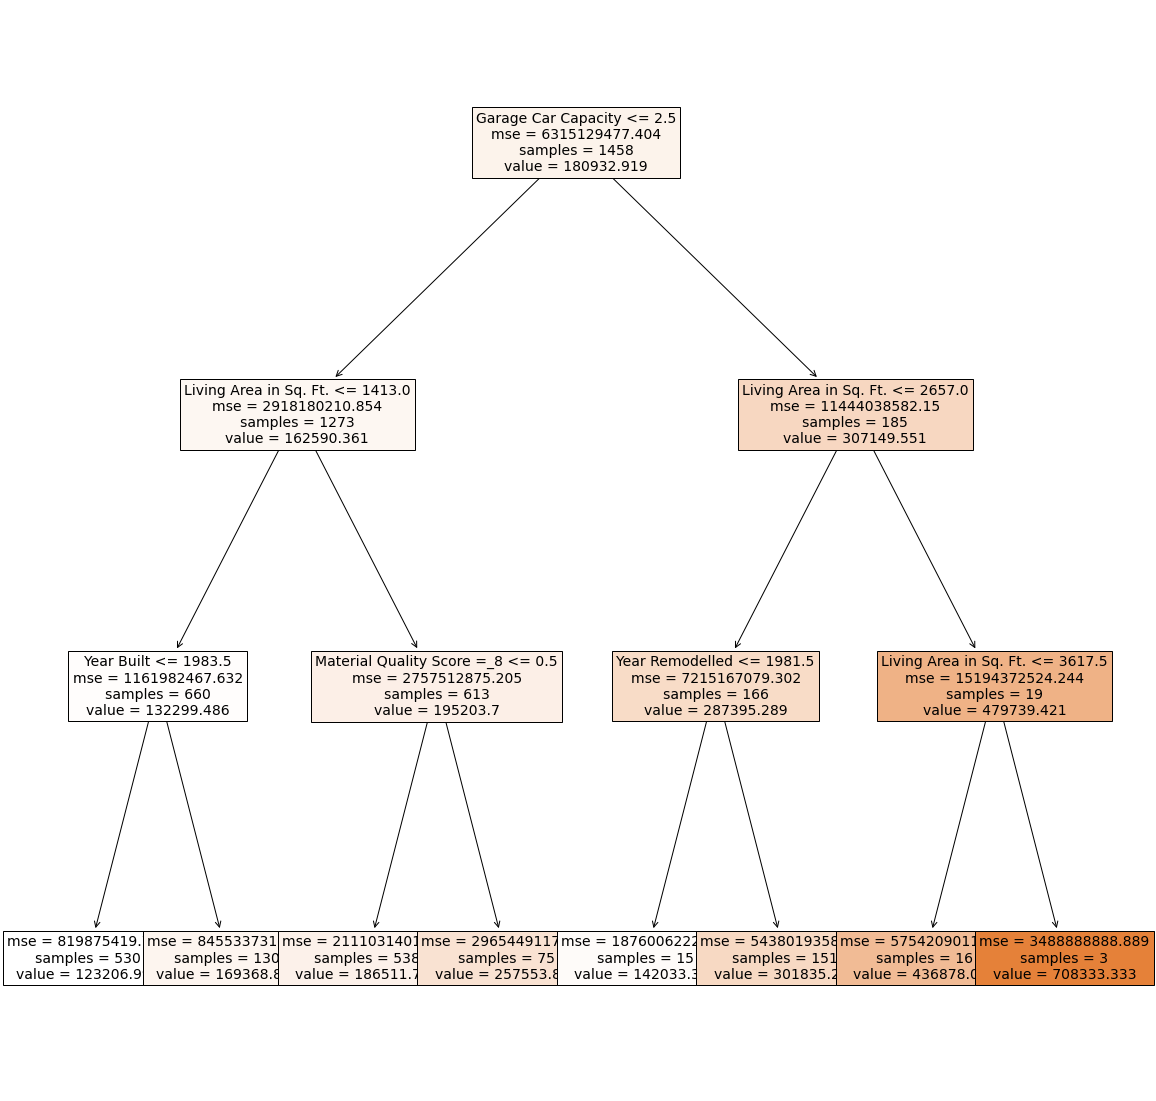

In [30]:
fig = plt.figure(figsize=(20, 20))
plot_tree(dtr, feature_names=train.columns, fontsize=14, filled=True)
''

## Random Forest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

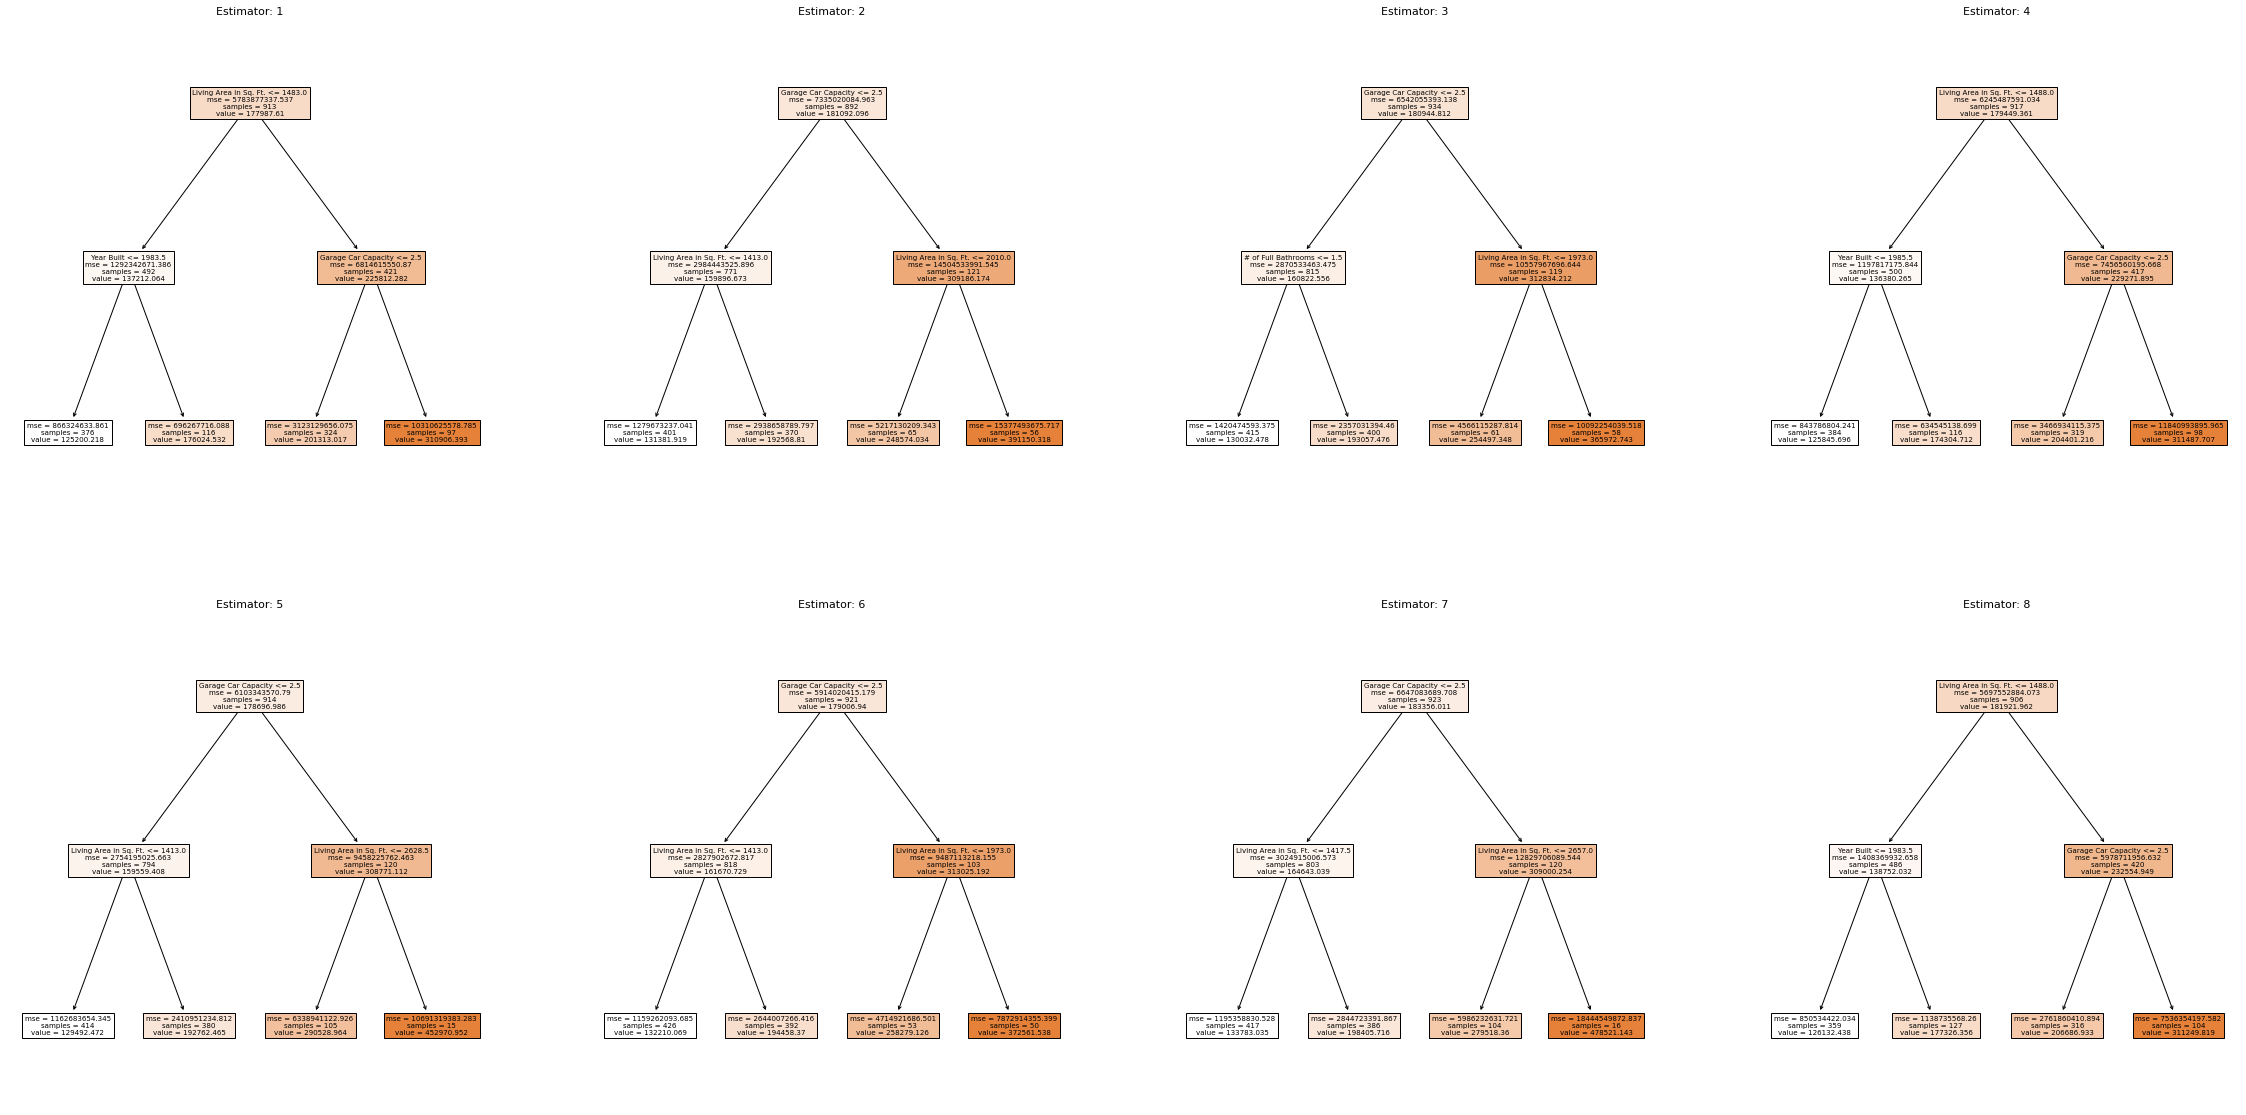

In [26]:
rows = 2
cols = 4

fig, axes = plt.subplots(nrows = rows,ncols = cols,figsize = (cols*10,rows*10))
for index in range(0, rows*cols):
    row = int(index / cols)
    col = index - row*cols
    plot_tree(rfr.estimators_[index],
               feature_names = train.columns, 
               filled = True,
               ax = axes[row, col]);

    axes[row, col].set_title('Estimator: ' + str(index + 1), fontsize = 11)

## k-NN Regression

In [27]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=2)

knn.fit(train, y_train)

NearestNeighbors(n_neighbors=2)